# Библиотеки и CUDA

In [1]:
# обработка ошибок и предупреждений
import warnings
warnings.filterwarnings('ignore')

In [2]:
# вывод всех графиков и прочих картинок в самом файле .ipynb
%matplotlib inline

In [91]:
# для работы с данными в формате DataFrame (анализ; подготовка набора данных)
import pandas as pd 
import librosa # библиотека для работы с аудиофайлами
import os # для работы с файлами; системой
import matplotlib.pyplot as plt # графики; визуализация
import numpy as np # для работы с данными
from IPython.display import Audio # штука для работы с аудио
from datasets import load_dataset # для скачивания набора данных
from tqdm import tqdm 
import seaborn as sns # графики; визуализация
import ast

# Модуль А. Анализ и предобработка данных

## Анализ данных и предобработка

#### Датасет LJSpeech-1.1; чутчут пробных штук

*Исходные данные представлены в папке "LJSpeech-1.1". В ней содержатся следующие файлы:*

* Файл "metadata.csv", в котором хранятся тексты 

* Файл README с описанием набора данных

* Папка "wavs", в которой хранятся аудиофайлы в формате .wav с голосовой записью текстов из "metadata.csv".  *Каждому аудиофайлу соответствует текст с таким же значением в первой колонке в файле .csv*

____

Для анализа файла "metadata.csv" я сделаю из него датафрейм с помощью библиотеки pandas и буду анализировать так же с помощью методов из этой библиотеки

*ps: датафрейм где-то будет сокращён до дф*

In [13]:
# создаём дф
df_ishod = pd.read_csv(r'LJSpeech-1.1\metadata.csv', sep = '|', header=None)
df_ishod # вывод дф

,0,1,2
0,LJ001-0001,"Printing, in the only sense with which we are ...","Printing, in the only sense with which we are ..."
1,LJ001-0002,in being comparatively modern.,in being comparatively modern.
2,LJ001-0003,For although the Chinese took impressions from...,For although the Chinese took impressions from...
3,LJ001-0004,"produced the block books, which were the immed...","produced the block books, which were the immed..."
4,LJ001-0005,the invention of movable metal letters in the ...,the invention of movable metal letters in the ...
...,...,...,...
13095,LJ050-0274,made certain recommendations which it believes...,made certain recommendations which it believes...
13096,LJ050-0275,materially improve upon the procedures in effe...,materially improve upon the procedures in effe...
13097,LJ050-0276,"As has been pointed out, the Commission has no...","As has been pointed out, the Commission has no..."
13098,LJ050-0277,with the active cooperation of the responsible...,with the active cooperation of the responsible...


В первой колонке датафрейма хранятся названия файлов из папки "wavs", во второй и третьей колонках - тексты из аудиофайлов.

Называем колонки в датафрейме в соответствии с тем, какая информация в них есть:

In [14]:
df_ishod.columns = ['file_name', 'text1', 'text2'] # добавляем колонки
df_ishod # выводим дф

,file_name,text1,text2
0,LJ001-0001,"Printing, in the only sense with which we are ...","Printing, in the only sense with which we are ..."
1,LJ001-0002,in being comparatively modern.,in being comparatively modern.
2,LJ001-0003,For although the Chinese took impressions from...,For although the Chinese took impressions from...
3,LJ001-0004,"produced the block books, which were the immed...","produced the block books, which were the immed..."
4,LJ001-0005,the invention of movable metal letters in the ...,the invention of movable metal letters in the ...
...,...,...,...
13095,LJ050-0274,made certain recommendations which it believes...,made certain recommendations which it believes...
13096,LJ050-0275,materially improve upon the procedures in effe...,materially improve upon the procedures in effe...
13097,LJ050-0276,"As has been pointed out, the Commission has no...","As has been pointed out, the Commission has no..."
13098,LJ050-0277,with the active cooperation of the responsible...,with the active cooperation of the responsible...


В датафрейме 13100 строчек, столько же, сколько и аудиофайлов.

* В первую очередь посмотрим, отличаются ли тексты в колонках text1 и text2

In [ ]:
list_dub = [] # список для индексов строк с разными текстами в колонках

# проходимся по всем строчкам в дф
for i in range(len(df_ishod)):
    # проверяем равны ли данные
    if df_ishod['text1'].iloc[i] != df_ishod['text2'].iloc[i]:
        print(i) # если нет, то выводим индекс строки
        list_dub.append(i) # и добавляем его в список list_dub

print(f'Количество строк с неодинаковыми текстами: {len(list_dub)}\nИндексы строк с неодинаковыми текстами: {list_dub}')

6
23
30
33
37
44
48
76
90
91
92
121
186
193
194
195
196
198
199
200
201
205
206
207
209
210
211
214
215
217
218
219
220
221
233
237
240
247
263
274
302
303
304
306
308
309
310
311
313
314
321
323
331
332
335
338
339
340
341
342
343
344
348
360
361
363
378
383
399
409
424
425
427
430
432
448
451
452
454
456
476
482
488
498
508
523
557
558
565
572
573
574
576
577
593
596
665
699
715
717
745
798
809
810
816
871
881
894
896
908
945
948
954
959
961
972
973
976
980
981
989
1014
1021
1022
1056
1084
1097
1111
1118
1119
1120
1130
1147
1149
1176
1192
1193
1194
1196
1203
1252
1253
1256
1259
1260
1264
1285
1305
1319
1334
1338
1343
1359
1361
1368
1369
1371
1374
1400
1405
1419
1425
1426
1500
1537
1538
1539
1655
1726
1803
1824
1825
1853
1856
1868
1907
1929
1933
1935
1939
1949
1968
1969
1978
1981
1984
1987
1988
1990
1998
2004
2018
2042
2061
2112
2117
2119
2124
2149
2154
2158
2163
2165
2233
2287
2317
2446
2453
2455
2456
2458
2459
2460
2461
2462
2464
2465
2474
2475
2483
2488
2503
2535
2553
2570
2586
259

In [ ]:
df_dub = pd.DataFrame(columns=['file_name', 'text1', 'text2']) # дф для строк с разными текстами
# проходимся по всем строкам
for i in range(len(df_ishod)):
    # если индекс есть в листе, то добавляем соответствующую строку в df_dub
    if i in list_dub:
        df_dub = pd.concat([df_dub, df_ishod.loc[[i]]], ignore_index=True)

df_dub # выводим дф

,file_name,text1,text2
0,LJ001-0007,"the earliest book printed with movable types, ...","the earliest book printed with movable types, ..."
1,LJ001-0024,But the first Bible actually dated (which also...,But the first Bible actually dated (which also...
2,LJ001-0031,In 1465 Sweynheim and Pannartz began printing ...,In fourteen sixty-five Sweynheim and Pannartz ...
3,LJ001-0034,"They printed very few books in this type, thre...","They printed very few books in this type, thre..."
4,LJ001-0038,while in 1470 at Paris Udalric Gering and his ...,while in fourteen seventy at Paris Udalric Ger...
...,...,...,...
1516,LJ050-0236,"Thus, in the 4 months following the assassinat...","Thus, in the four months following the assassi..."
1517,LJ050-0237,"the FBI, on 16 separate occasions, supplied a ...","the FBI, on sixteen separate occasions, suppli..."
1518,LJ050-0239,"From February 11 through June 30, 1964,","From February eleven through June thirty, nine..."
1519,LJ050-0240,"the Service had the advantage of 9,500 hours o...",the Service had the advantage of nine thousand...


* Отличия в текстах по колонкам text1 и text2 заключаются в том, что в колонке text1 числовые значения записаны цифрами, а в колонке text2 они записаны словами.

_____

Для анализа аудиофайлов я создам датафрейм, в котором будут храниться название аудиофайла и его продолжительность в секундах.

In [8]:
df_audio = pd.DataFrame(columns = ['file_path', 'file_name', 'duration']) # создаём дф

In [9]:
count = 0
for file in os.listdir(r'LJSpeech-1.1\wavs'):
    print(count, file)
    if not file.endswith('.wav'): print(file)
    file_path = os.path.join(r'LJSpeech-1.1\wavs', file)
    audio, sr = librosa.load(file_path, sr = None)
    duration = librosa.get_duration(y = audio, sr = sr)
    count += 1
    df_audio.loc[count] = [file_path, file, duration]

0 LJ001-0001.wav
1 LJ001-0002.wav
2 LJ001-0003.wav
3 LJ001-0004.wav
4 LJ001-0005.wav
5 LJ001-0006.wav
6 LJ001-0007.wav
7 LJ001-0008.wav
8 LJ001-0009.wav
9 LJ001-0010.wav
10 LJ001-0011.wav
11 LJ001-0012.wav
12 LJ001-0013.wav
13 LJ001-0014.wav
14 LJ001-0015.wav
15 LJ001-0016.wav
16 LJ001-0017.wav
17 LJ001-0018.wav
18 LJ001-0019.wav
19 LJ001-0020.wav
20 LJ001-0021.wav
21 LJ001-0022.wav
22 LJ001-0023.wav
23 LJ001-0024.wav
24 LJ001-0025.wav
25 LJ001-0026.wav
26 LJ001-0027.wav
27 LJ001-0028.wav
28 LJ001-0029.wav
29 LJ001-0030.wav
30 LJ001-0031.wav
31 LJ001-0032.wav
32 LJ001-0033.wav
33 LJ001-0034.wav
34 LJ001-0035.wav
35 LJ001-0036.wav
36 LJ001-0037.wav
37 LJ001-0038.wav
38 LJ001-0039.wav
39 LJ001-0040.wav
40 LJ001-0041.wav
41 LJ001-0042.wav
42 LJ001-0043.wav
43 LJ001-0044.wav
44 LJ001-0045.wav
45 LJ001-0046.wav
46 LJ001-0047.wav
47 LJ001-0048.wav
48 LJ001-0049.wav
49 LJ001-0050.wav
50 LJ001-0051.wav
51 LJ001-0052.wav
52 LJ001-0053.wav
53 LJ001-0054.wav
54 LJ001-0055.wav
55 LJ001-0056.wav
56

In [10]:
df_audio

,file_path,file_name,duration
1,LJSpeech-1.1\wavs\LJ001-0001.wav,LJ001-0001.wav,9.655011
2,LJSpeech-1.1\wavs\LJ001-0002.wav,LJ001-0002.wav,1.899546
3,LJSpeech-1.1\wavs\LJ001-0003.wav,LJ001-0003.wav,9.666621
4,LJSpeech-1.1\wavs\LJ001-0004.wav,LJ001-0004.wav,5.138730
5,LJSpeech-1.1\wavs\LJ001-0005.wav,LJ001-0005.wav,8.110884
...,...,...,...
13096,LJSpeech-1.1\wavs\LJ050-0274.wav,LJ050-0274.wav,4.500181
13097,LJSpeech-1.1\wavs\LJ050-0275.wav,LJ050-0275.wav,9.120952
13098,LJSpeech-1.1\wavs\LJ050-0276.wav,LJ050-0276.wav,8.563673
13099,LJSpeech-1.1\wavs\LJ050-0277.wav,LJ050-0277.wav,8.714603


In [11]:
df_audio['duration'].describe()

count    13100.000000
mean         6.573823
std          2.185431
min          1.110068
25%          4.987800
50%          6.764127
75%          8.389524
max         10.096190
Name: duration, dtype: float64

* Минимальное время длительности аудиофайла - 1,1 секунда, максимальная - 10. Разница между значениями по квартилям примерно равномерная

* --> выбросов по длительности аудиофайлов нет

___

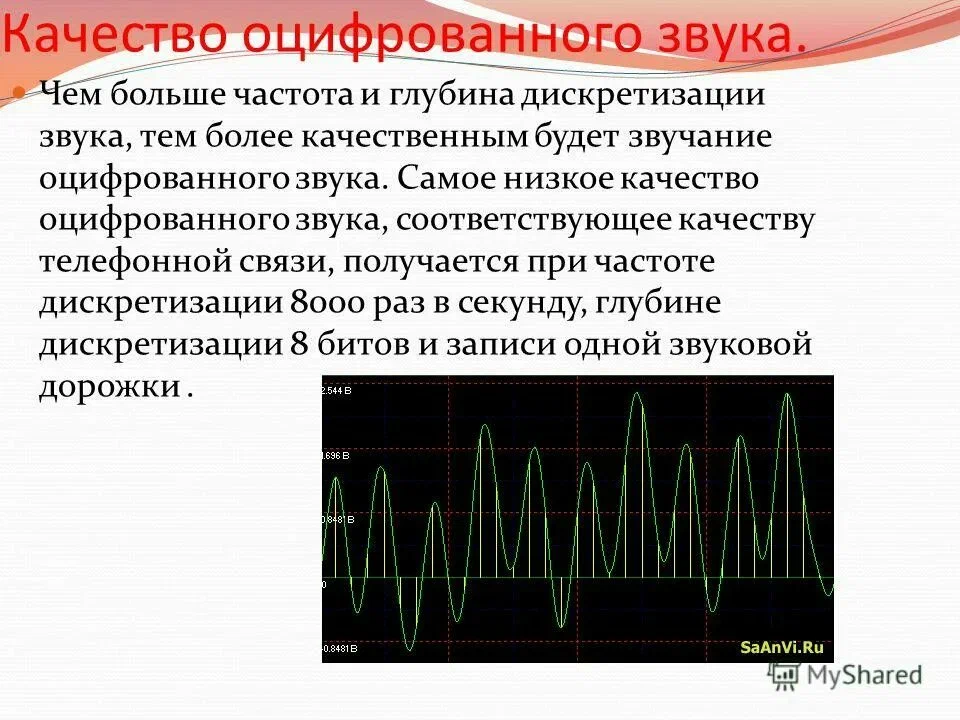

пробно визуализирую рандомный аудиофайл ищ набора данных:

***Форма волны (??????)***

* по оси y откладывается амплитуда сигнала, а по оси x - время

In [ ]:
# читаемзагружаем файл
audio_array, sr = librosa.load(r'LJSpeech-1.1\wavs\LJ001-0007.wav', sr = None)

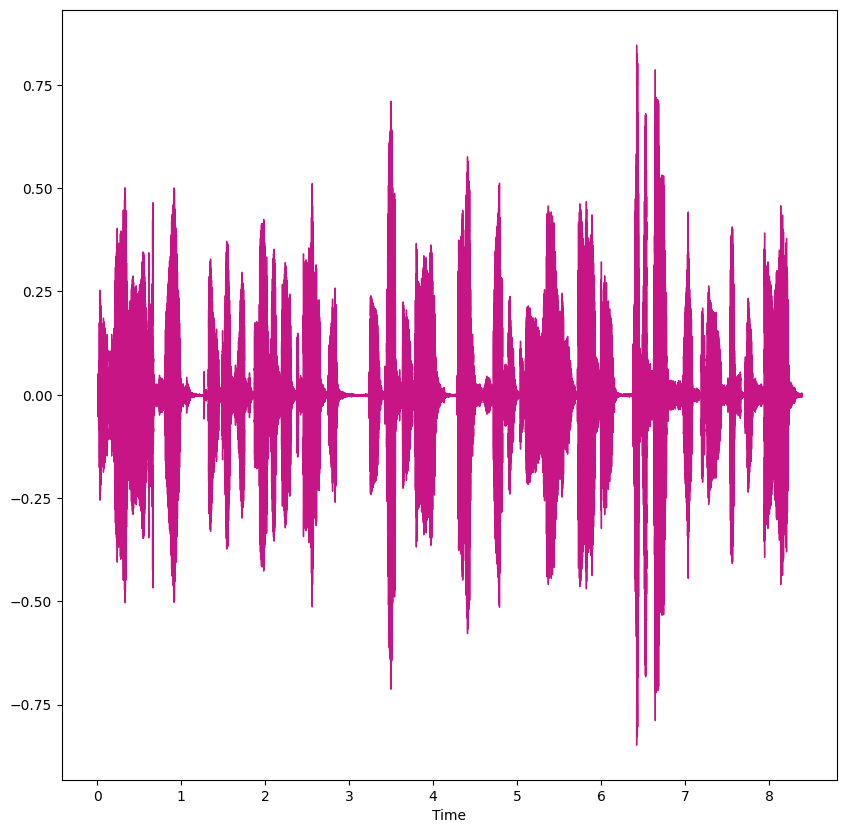

In [25]:
plt.figure(figsize=(10, 10)).set_figwidth # фигура
librosa.display.waveshow(audio_array, sr = sr, color = 'mediumvioletred') # сам график
plt.show() # вывод графика

***Частотный спектр***

* Построение частотного спектра аудиосигнала, также известное как частотный интервал. Спектр вычисляется с помощью Дискретного Преобразования Фурье или ДПФ (Discrete Fourier Transform - DFT). Он описывает отдельные частоты, из которых состоит сигнал, и их силу.

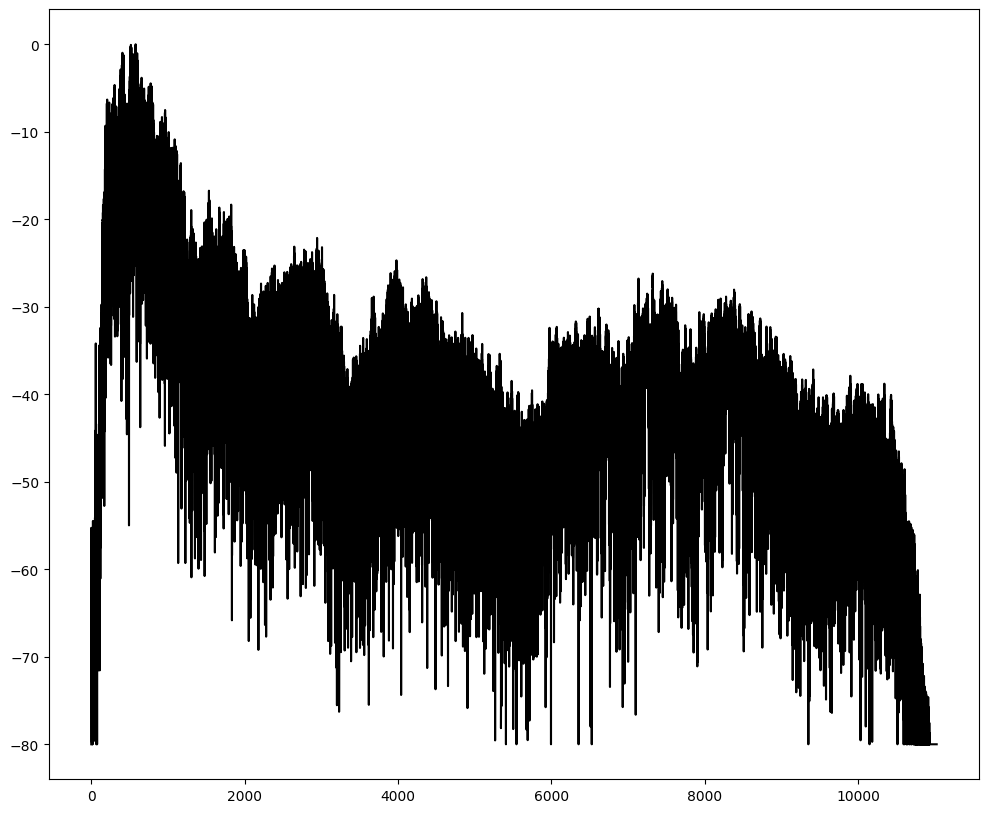

In [ ]:
# рассчёт ДПФ

window = np.hanning(len(audio_array))
windowed_input = audio_array * window
dft = np.fft.rfft(windowed_input)

# получаем амплитудный спектр в децибелах
amplitude = np.abs(dft)
amplitude_db = librosa.amplitude_to_db(amplitude, ref = np.max) # метод для преобразования значений амплитуды в дециб. шкалу

# получаем частотные столбцы 
frequency = librosa.fft_frequencies(sr = sr, n_fft = len(audio_array))

# строим график
plt.figure(figsize=(10, 10)).set_figwidth(12) # фигура
plt.plot(frequency, amplitude_db, color = 'black') # сам график
plt.show() # вывод графика

***Спектрограмма***

* Представляет собой график изменения частотного содержания звукового сигнала во времени. Спектрограмма позволяет увидеть время, частоту, амплитуду на одном графике. 

Алгоритм, выполняющий эти вычисления, называется ОПФ или Оконное Преобразование Фурье (Short Time Fourier Transform - STFT).

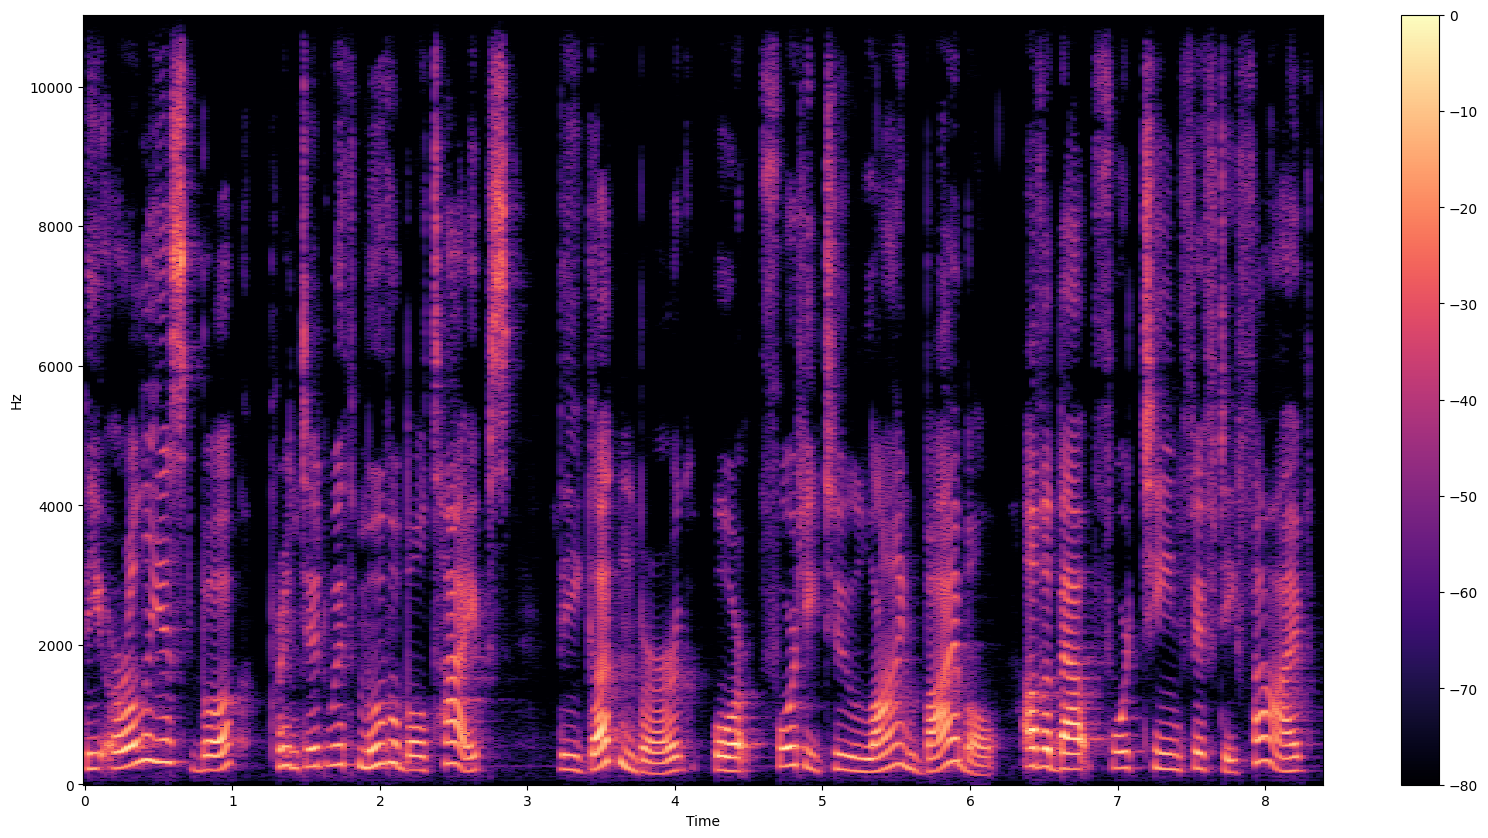

In [31]:
D = librosa.stft(audio_array)
S_db = librosa.amplitude_to_db(np.abs(D), ref = np.max)

# построение графика
plt.figure(figsize = (10, 10)).set_figwidth(20)
librosa.display.specshow(S_db, x_axis='time', y_axis='hz')
plt.colorbar()
plt.show()

На этом графике ось x представляет собой время, как и при визуализации формы волны, но теперь ось y представляет собой частоту в Гц. *Интенсивность цвета показывает амплитуду или мощность частотной составляющей в каждый момент времени, измеряемую в децибелах (дБ)*

***Мэл-спектрограмма***

Мел-спектрограмма - это разновидность спектрограммы, которая широко используется в задачах обработки речи и машинного обучения. Она похожа на спектрограмму тем, что *показывает частотное содержание аудиосигнала во времени, но на другой частотной оси.*

В стандартной спектрограмме частотная ось линейна и измеряется в герцах (Гц). Однако слуховая система человека более чувствительна к изменениям на низких частотах, чем на высоких, и эта чувствительность уменьшается логарифмически с увеличением частоты. Шкала Мэл - это перцептивная шкала, которая аппроксимирует нелинейную частотную характеристику человеческого уха.

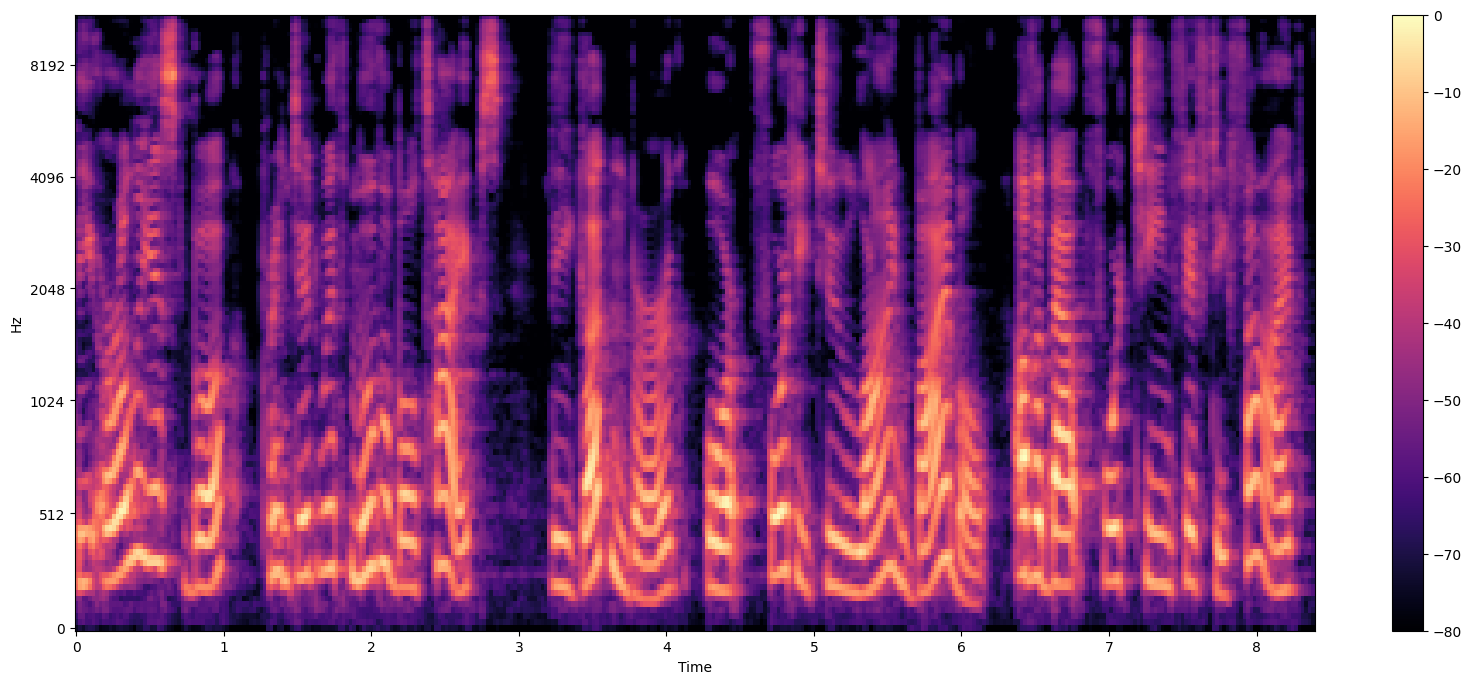

In [30]:
S = librosa.feature.melspectrogram(y = audio_array, sr = sr)
S_dB = librosa.power_to_db(S, ref = np.max)

# построение графика
plt.figure(figsize = (8, 8)).set_figwidth(20)
librosa.display.specshow(S_dB, x_axis = 'time', y_axis = 'mel', sr=sr)
plt.colorbar()
plt.show()

_____

### Датасет какой-то от сбера 

#### Скачивание датасета; формирование датафрейма

* Сначала загружаем датасет:

In [4]:
ds = load_dataset('bond005/sberdevices_golos_10h_crowd', cache_dir = 'data_sber')

Смотрим на скаченные данные; выводим что-то из них для понимания структуры:

In [5]:
ds # выводим данные

DatasetDict({
    train: Dataset({
        features: ['audio', 'transcription'],
        num_rows: 7993
    })
    validation: Dataset({
        features: ['audio', 'transcription'],
        num_rows: 793
    })
    test: Dataset({
        features: ['audio', 'transcription'],
        num_rows: 9994
    })
})

In [6]:
print(len(ds['train'])) # кол-во элементов в train

7993


* Данные сразу разделены на выборки: обучающую, валидационную и тестовую. Для формирования данных для обучения я возьму только данные из обучабщей выборки (train), так как 7993 объектов вполне хватит для дальнейшей работы. 

Я не буду брать выборки так, как они распределены изначально, так как получится довольно объёмный набор данных, а значит и времени на его обработку и обучение потребуется намного больше

___

Вывожу немного информации из данных, чтобы понять их структуру:

In [39]:
aud = ds['train']['audio'][0]
aud

{'path': None,
 'array': array([ 3.05175781e-05,  3.05175781e-05,  0.00000000e+00, ...,
        -1.09863281e-03, -7.93457031e-04, -1.52587891e-04]),
 'sampling_rate': 16000}

В переменной "aud" сохранена *информация о звуке*: массив с закодированной звуковой дорожкой, значение частоты дискретизации, путь 

In [ ]:
tr = ds['train']['transcription'][0] # выводим первый элемент из обуч. выборки из фичи(?) transcription
tr

'шестнадцатая часть сезона пять сериала лемони сникет тридцать три несчастья'

* Через переменную tr я вывела текст аудиофайла

Так же я выведу сам массив аудиофайла:

In [ ]:
# берём значение массива от переменной aud
array = aud['array']
print(array) # выводим

[ 3.05175781e-05  3.05175781e-05  0.00000000e+00 ... -1.09863281e-03
 -7.93457031e-04 -1.52587891e-04]


In [ ]:
ds['train']['audio'][0]['sampling_rate'] # так же выводим частоту дискретизации

16000

Аудиофайл можно воспроизвести с помощью метода Audio из встроенной библиотеки IPython.display:

In [ ]:
Audio(aud['array'], rate = aud['sampling_rate']) # вывод аудио 

пс: в этом случае фраза из аудиофайла соответствует тексту

___

* Для дальнейшей работы надо создать датафрейм с закодированным звуком и текстом. Его я буду использовать для анализа, обработки и далее для обучения

В датафрейме будет три колонки: 

* audio_array - numpy массив (закодированный аудиофайл)

* sr - частота дискретизации (sampling rate)

* text - текст, соответствующий содержанию аудиофайла

In [5]:
# в отдельные переменные помещаем всю информацию о звуке и весь текст
train_audio = ds['train']['audio'] # аудио
train_txt = ds['train']['transcription'] # текст
print(len(train_audio), len(train_txt), sep = '\n') # выводим кол-во элементов в данных

7993
7993


In [6]:
# списки для хранения данных
arrays = [] # массивы со звуком
sr = [] # частота дискретизации
txt = [] # текст

In [7]:
%%time
# проходимся по всем данным
for i in tqdm(range(len(train_audio)), desc='Preproc..', unit='sample'):
    arrays.append(train_audio[i]['array']) # добавляем в соотв. список массив со звуком
    sr.append(train_audio[i]['sampling_rate']) # добавляем в соотв. список значение частоты
    txt.append(train_txt[i]) # добавляем в соотв. список текст

Preproc..: 100%|██████████| 7993/7993 [00:00<00:00, 1108926.70sample/s]

CPU times: total: 15.6 ms
Wall time: 23.7 ms


In [8]:
df_sb = pd.DataFrame() # создаём датафрейм
df_sb['audio_array'] = arrays # заполняем колонку с массивами
df_sb['sr'] = sr # заполняем колонку с частотой
df_sb['text'] = txt # заполняем колонку с текстом
print(df_sb.shape) # выводим размер дф
df_sb.head() # выводим первые 5 строчек дф

(7993, 3)


,audio_array,sr,text
0,"[3.0517578125e-05, 3.0517578125e-05, 0.0, 0.0,...",16000,шестнадцатая часть сезона пять сериала лемони ...
1,"[-3.0517578125e-05, 0.0, 0.0, -3.0517578125e-0...",16000,три ангела на смотрешке
2,"[0.0, 0.0, 0.0, 0.0, 3.0517578125e-05, 3.05175...",16000,цветущая парочка цветущие влюбленные восьмой с...
3,"[3.0517578125e-05, 0.0, 0.0, 0.0, -3.051757812...",16000,афина алиса скажи баланс карты сбербанк
4,"[0.0098876953125, 0.010498046875, 0.0075073242...",16000,фильмец стэнли кубрика борджиа


#### Анализ данных с помощью методов моделирования систем

(анализ звука)

* в первую очередь я посмотрю на значения в колонке sr, где хранится частота дискретизации:

In [9]:
df_sb['sr'].unique() # выводим уникальные значения

array([16000])

Всего одно уникальное значение, --> у всех аудиофайлов частота дискретизации равна 16000

* Далее было бы неплохо добавить в датафрейм информацию о длительности аудиофайла

In [11]:
durations = [] # список для хранения длительности аудио

In [12]:
%%time
for i in range(len(df_sb)):
    print(i)
    duration = librosa.get_duration(y = df_sb['audio_array'].iloc[i], sr = df_sb['sr'].iloc[i])
    durations.append(duration)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

Создаём в датафрейме колонку для хранения длительности аудиофайлов в секундах, в ней будут данные из списка durations

In [13]:
df_sb['duration'] = durations
df_sb

,audio_array,sr,text,duration
0,"[3.0517578125e-05, 3.0517578125e-05, 0.0, 0.0,...",16000,шестнадцатая часть сезона пять сериала лемони ...,5.160000
1,"[-3.0517578125e-05, 0.0, 0.0, -3.0517578125e-0...",16000,три ангела на смотрешке,1.820000
2,"[0.0, 0.0, 0.0, 0.0, 3.0517578125e-05, 3.05175...",16000,цветущая парочка цветущие влюбленные восьмой с...,4.640000
3,"[3.0517578125e-05, 0.0, 0.0, 0.0, -3.051757812...",16000,афина алиса скажи баланс карты сбербанк,4.620375
4,"[0.0098876953125, 0.010498046875, 0.0075073242...",16000,фильмец стэнли кубрика борджиа,5.540000
...,...,...,...,...
7988,"[0.0, 3.0517578125e-05, 3.0517578125e-05, 3.05...",16000,найти кино пастырь,2.660000
7989,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",16000,какие музыканты играют в клубах,2.066187
7990,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",16000,джой включи килла инстинкт,4.272062
7991,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",16000,канал ювелирочка смотреть передачи включи,4.460000


In [60]:
print(df_sb['duration'].sum())

32222.180625


Выводим статистические данные по колонке "duration" с помощью метода describe:

In [14]:
df_sb['duration'].describe()

count    7993.000000
mean        4.031300
std         1.863792
min         0.700000
25%         2.840000
50%         3.680000
75%         4.799625
max        27.540000
Name: duration, dtype: float64

Самый короткий аудиофайл длится меньше секунды, самый большой - 27,54 секунды. Разница у квартилей 25, 50 и 75 % примерно одна и та жа.

Средняя продолжительность составляет примерно 4 секунды

Визуализируем разброс по длительности аудиофайлов:

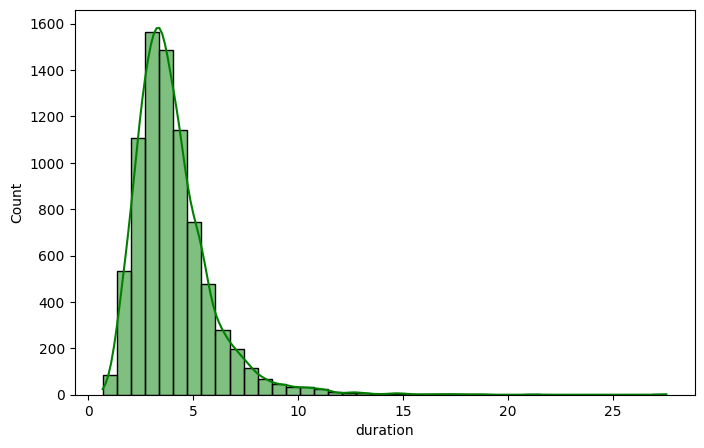

In [15]:
plt.figure(figsize=(8, 5))
sns.histplot(df_sb['duration'], kde = True, bins = 40, color = 'green')
plt.show()

<Axes: >

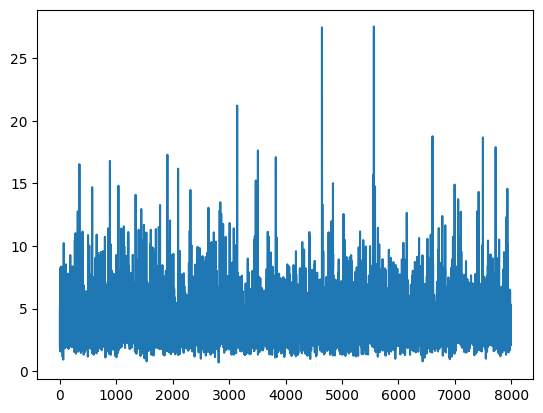

In [61]:
df_sb['duration'].plot()

* довольно много выбросов

In [45]:
df_sb['duration'][df_sb['duration'] > 10].describe()

count    112.000000
mean      12.461472
std        3.052355
min       10.040000
25%       10.565000
50%       11.303875
75%       12.985000
max       27.540000
Name: duration, dtype: float64

##### Основная частота

**Основная частота** - наименьшая частота периодического сигнала, определяющая высоту звука. Она отражает частоту вибраций голосовых связок; по ней можно понятоь насколько голос на записи высокий или низкий.

*Значения основной частоты можно интерпретировать след. образом:*

* Мужской голос: 80-150 Гц
* Женский голос: 150-300 Гц
* Детский голос: 300-500 Гц

Если основная частота слишком нестабильна или выпадает за диапазон 80-500 Гц, то скорее всего в аудиофайле много шумов и/или искажений

* Для вычисления основной частоты я буду использовать метод ```piptrack()``` из библиотеки ```librosa```. С его помощью вычисляется траектория основной частоты и её амплитуды по времени в аудиофайле. 

Эта функция возвращает два массива:

-- ```pitches``` — матрица с частотами на каждом временном шаге и для каждого частотного бина

-- ```magnitudes``` — матрица с амплитудами (энергиями) этих частот для каждого времени и бина

PS:

*частотный бин - диапазон частот, на который разбивается спектр при анализе с помощью FFT (быстрое преобразование Фурье) или STFT (кратковременное преобразование Фурье). Каждый бин представляет собой конкретную частоту, которая соответствует индексу в частотном спектре.*

*частотный спектр - представление сигнала в виде набора его составляющих частот и их амплитуд*

In [62]:
def get_pitch(audio, sr = 16000):
    pitches, magnitudas = librosa.piptrack(y = audio, sr = sr, fmin = 80, fmax = 300)
    pitch_values = pitches[magnitudas > np.median(magnitudas)] # фильтрация шума
    return np.median(pitch_values)

In [63]:
pitches_list = []

In [65]:
%%time
for i in range(len(df_sb)):
    print(i)
    pitches_list.append(get_pitch(df_sb['audio_array'].iloc[i]))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [68]:
df_sb['median_pitch'] = pitches_list

In [69]:
df_sb

,audio_array,sr,text,duration,count_words,median_pitch
0,"[3.0517578125e-05, 3.0517578125e-05, 0.0, 0.0,...",16000,шестнадцатая часть сезона пять сериала лемони ...,5.160000,10,211.825916
1,"[-3.0517578125e-05, 0.0, 0.0, -3.0517578125e-0...",16000,три ангела на смотрешке,1.820000,4,208.679326
2,"[0.0, 0.0, 0.0, 0.0, 3.0517578125e-05, 3.05175...",16000,цветущая парочка цветущие влюбленные восьмой с...,4.640000,6,211.282428
3,"[3.0517578125e-05, 0.0, 0.0, 0.0, -3.051757812...",16000,афина алиса скажи баланс карты сбербанк,4.620375,6,209.210110
4,"[0.0098876953125, 0.010498046875, 0.0075073242...",16000,фильмец стэнли кубрика борджиа,5.540000,4,194.935480
...,...,...,...,...,...,...
7988,"[0.0, 3.0517578125e-05, 3.0517578125e-05, 3.05...",16000,найти кино пастырь,2.660000,3,190.125653
7989,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",16000,какие музыканты играют в клубах,2.066187,5,190.428395
7990,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",16000,джой включи килла инстинкт,4.272062,4,148.171818
7991,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",16000,канал ювелирочка смотреть передачи включи,4.460000,5,203.892488


In [72]:
if os.path.exists(r'df_sb1.csv'):
    print('промежуточный датафрейм сохранён')
else: df_sb.to_csv('df_sb1.csv', sep='|')

промежуточный датафрейм сохранён


In [73]:
df_sb['median_pitch'].describe()

count    7993.000000
mean      196.782680
std        15.748954
min       101.929365
25%       188.122199
50%       195.809411
75%       204.736951
max       271.968363
Name: median_pitch, dtype: float64

Минимальная медианная основная частота ~101,93 Гц

Максимальная медианная основная частота ~271,97 Гц

* Довольно большая разница между мин. значением и первым квартилем

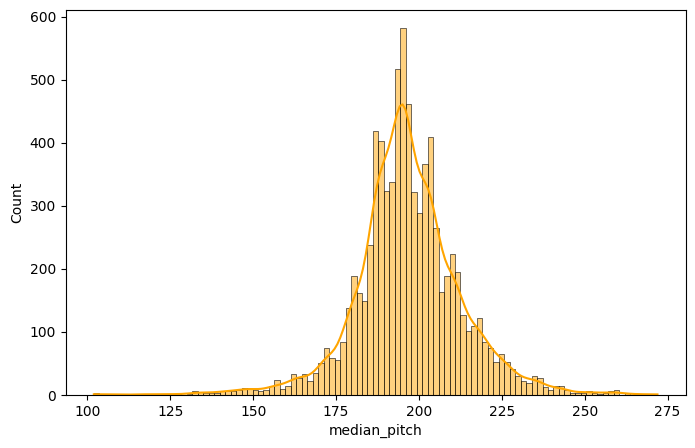

In [75]:
plt.figure(figsize=(8, 5))
sns.histplot(df_sb['median_pitch'], kde=True, color = 'orange')
plt.show()

Так же для более глубокого анализа необходимо посмотреть на шум в аудиофайлах. Для этого я буду использовать методы `librosa.feature.rms()` и `librosa.feature.spectral_flatness()`

##### Общая громкость

Общая громкость важна для определения громкости речи в аудиофайле. 

Для её нахождения необходимо вычислить среднеквадратичное значение амплитуды сигнала (rms). 

Rms потом переводится в децибелы. Чем больше значение Дц, тем громче голос в аудиофайле.

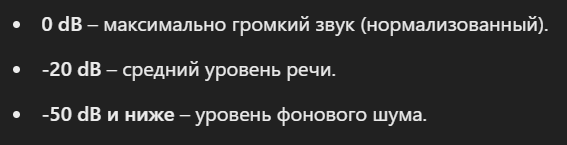

In [ ]:
def get_voice_vol(audio, sr = 16000):
    rms = librosa.feature.rms(y = audio)
    # ref=np.max, все значения нормализуются относительно максимального.
    rms_db = librosa.amplitude_to_db(rms, ref = np.max) # переводим в децибелы
    return np.mean(rms_db)

In [77]:
voice_vols_db = []

In [ ]:
%%time
for i in range(len(df_sb)):
    print(i)
    voice_vols_db.append(get_voice_vol(df_sb['audio_array'].iloc[i]))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [81]:
df_sb['db_voice_volume'] = voice_vols_db

In [82]:
df_sb

,audio_array,sr,text,duration,count_words,median_pitch,db_voice_volume
0,"[3.0517578125e-05, 3.0517578125e-05, 0.0, 0.0,...",16000,шестнадцатая часть сезона пять сериала лемони ...,5.160000,10,211.825916,-9.454481
1,"[-3.0517578125e-05, 0.0, 0.0, -3.0517578125e-0...",16000,три ангела на смотрешке,1.820000,4,208.679326,-16.237928
2,"[0.0, 0.0, 0.0, 0.0, 3.0517578125e-05, 3.05175...",16000,цветущая парочка цветущие влюбленные восьмой с...,4.640000,6,211.282428,-13.890154
3,"[3.0517578125e-05, 0.0, 0.0, 0.0, -3.051757812...",16000,афина алиса скажи баланс карты сбербанк,4.620375,6,209.210110,-14.950606
4,"[0.0098876953125, 0.010498046875, 0.0075073242...",16000,фильмец стэнли кубрика борджиа,5.540000,4,194.935480,-18.011992
...,...,...,...,...,...,...,...
7988,"[0.0, 3.0517578125e-05, 3.0517578125e-05, 3.05...",16000,найти кино пастырь,2.660000,3,190.125653,-16.967819
7989,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",16000,какие музыканты играют в клубах,2.066187,5,190.428395,-6.115798
7990,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",16000,джой включи килла инстинкт,4.272062,4,148.171818,-7.496449
7991,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",16000,канал ювелирочка смотреть передачи включи,4.460000,5,203.892488,-16.668974


##### Уровень шума

Для анализа и формирования данных для обучения очень важно просмотреть значения уровня шума в аудиофайлах. 

Оценить уровень шума можно через спектральные характеристики. Самая ключевая - спектральная плоскость (Spectral Flatness, SF)

SF - мера того, насколько спектр звука похож на белый шум. Она будет вычисляться так же в децибелах.

*Чем больше значение спектральной плоскости, тем больше сигнал похож на шум.*

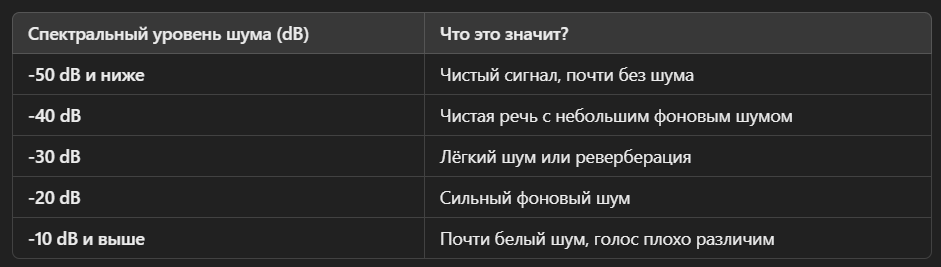

In [84]:
def get_sf(audio):
    flatness = librosa.feature.spectral_flatness(y = audio)
    # ref=np.max НЕ НУЖЕН тк сф уже нормализованная величина
    return np.mean(librosa.amplitude_to_db(flatness)) # среднее значение; флатнесс переводим в Дцб

In [92]:
noise_values = []

In [93]:
%%time
for i in range(len(df_sb)):
    print(i)
    noise_values.append(get_sf(df_sb['audio_array'].iloc[i]))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [94]:
print(len(noise_values))

7993


In [95]:
df_sb['db_noise_level'] = noise_values

In [96]:
df_sb

,audio_array,sr,text,duration,count_words,median_pitch,db_voice_volume,db_noise_level
0,"[3.0517578125e-05, 3.0517578125e-05, 0.0, 0.0,...",16000,шестнадцатая часть сезона пять сериала лемони ...,5.160000,10,211.825916,-9.454481,-27.737779
1,"[-3.0517578125e-05, 0.0, 0.0, -3.0517578125e-0...",16000,три ангела на смотрешке,1.820000,4,208.679326,-16.237928,-51.932343
2,"[0.0, 0.0, 0.0, 0.0, 3.0517578125e-05, 3.05175...",16000,цветущая парочка цветущие влюбленные восьмой с...,4.640000,6,211.282428,-13.890154,-31.375514
3,"[3.0517578125e-05, 0.0, 0.0, 0.0, -3.051757812...",16000,афина алиса скажи баланс карты сбербанк,4.620375,6,209.210110,-14.950606,-43.853320
4,"[0.0098876953125, 0.010498046875, 0.0075073242...",16000,фильмец стэнли кубрика борджиа,5.540000,4,194.935480,-18.011992,-42.743308
...,...,...,...,...,...,...,...,...
7988,"[0.0, 3.0517578125e-05, 3.0517578125e-05, 3.05...",16000,найти кино пастырь,2.660000,3,190.125653,-16.967819,-38.332441
7989,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",16000,какие музыканты играют в клубах,2.066187,5,190.428395,-6.115798,-51.761285
7990,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",16000,джой включи килла инстинкт,4.272062,4,148.171818,-7.496449,-51.943409
7991,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",16000,канал ювелирочка смотреть передачи включи,4.460000,5,203.892488,-16.668974,-36.848823


In [98]:
if os.path.exists(r'df_sb2.csv'):
    print('промежуточный датафрейм сохранён')
else: df_sb.to_csv('df_sb2.csv', sep='|')

промежуточный датафрейм сохранён


In [99]:
df_sb['db_noise_level'].describe()

count    7993.000000
mean      -41.141754
std        10.213798
min       -85.159154
25%       -47.927701
50%       -40.147735
75%       -33.555161
max       -13.659948
Name: db_noise_level, dtype: float64

* Чем больше (положительнее) значение, тем больше шума. Если значение около -30, это значит, что есть немного шума, но он некритичен. Следуя из этого я удалю данные, где уровень шума превышает -30 децибел.

In [106]:
df_sb2 = df_sb[df_sb['db_noise_level'] < -30]

In [107]:
df_sb2

,audio_array,sr,text,duration,count_words,median_pitch,db_voice_volume,db_noise_level
1,"[-3.0517578125e-05, 0.0, 0.0, -3.0517578125e-0...",16000,три ангела на смотрешке,1.820000,4,208.679326,-16.237928,-51.932343
2,"[0.0, 0.0, 0.0, 0.0, 3.0517578125e-05, 3.05175...",16000,цветущая парочка цветущие влюбленные восьмой с...,4.640000,6,211.282428,-13.890154,-31.375514
3,"[3.0517578125e-05, 0.0, 0.0, 0.0, -3.051757812...",16000,афина алиса скажи баланс карты сбербанк,4.620375,6,209.210110,-14.950606,-43.853320
4,"[0.0098876953125, 0.010498046875, 0.0075073242...",16000,фильмец стэнли кубрика борджиа,5.540000,4,194.935480,-18.011992,-42.743308
5,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",16000,поставь бессердечный аш д,3.178313,4,163.985728,-18.152136,-38.880279
...,...,...,...,...,...,...,...,...
7988,"[0.0, 3.0517578125e-05, 3.0517578125e-05, 3.05...",16000,найти кино пастырь,2.660000,3,190.125653,-16.967819,-38.332441
7989,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",16000,какие музыканты играют в клубах,2.066187,5,190.428395,-6.115798,-51.761285
7990,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",16000,джой включи килла инстинкт,4.272062,4,148.171818,-7.496449,-51.943409
7991,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",16000,канал ювелирочка смотреть передачи включи,4.460000,5,203.892488,-16.668974,-36.848823


___

Избавившись от аудиофайлов с сильным шумом, начинаю анализировать громкость голоса (колонка "db_voice_volume")


* чем больше значение, тем громче голос

In [108]:
df_sb2['db_voice_volume'].describe()

count    6936.000000
mean      -18.045118
std         5.653048
min       -48.530220
25%       -21.398146
50%       -17.335126
75%       -14.057730
max        -2.539443
Name: db_voice_volume, dtype: float64

Выведем топ минимальных значений (низкая громкость голоса):

In [111]:
df_sb2['db_voice_volume'].nsmallest(20)

626    -48.530220
3528   -48.274162
147    -47.101131
1402   -43.249813
6061   -43.015472
2735   -42.775219
7158   -41.696312
7834   -40.700344
951    -39.498127
6041   -38.976631
6889   -38.661560
7782   -38.580578
5729   -38.393570
407    -38.362862
4898   -38.226196
6368   -37.532398
6676   -37.522240
784    -37.453487
295    -37.309277
7204   -37.299217
Name: db_voice_volume, dtype: float32

* Избавляюсь от данных, где уровень громкости меньше -25 децибел

In [115]:
df_sb3 = df_sb2[df_sb2['db_voice_volume'] > -25]
df_sb3

,audio_array,sr,text,duration,count_words,median_pitch,db_voice_volume,db_noise_level
1,"[-3.0517578125e-05, 0.0, 0.0, -3.0517578125e-0...",16000,три ангела на смотрешке,1.820000,4,208.679326,-16.237928,-51.932343
2,"[0.0, 0.0, 0.0, 0.0, 3.0517578125e-05, 3.05175...",16000,цветущая парочка цветущие влюбленные восьмой с...,4.640000,6,211.282428,-13.890154,-31.375514
3,"[3.0517578125e-05, 0.0, 0.0, 0.0, -3.051757812...",16000,афина алиса скажи баланс карты сбербанк,4.620375,6,209.210110,-14.950606,-43.853320
4,"[0.0098876953125, 0.010498046875, 0.0075073242...",16000,фильмец стэнли кубрика борджиа,5.540000,4,194.935480,-18.011992,-42.743308
5,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",16000,поставь бессердечный аш д,3.178313,4,163.985728,-18.152136,-38.880279
...,...,...,...,...,...,...,...,...
7988,"[0.0, 3.0517578125e-05, 3.0517578125e-05, 3.05...",16000,найти кино пастырь,2.660000,3,190.125653,-16.967819,-38.332441
7989,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",16000,какие музыканты играют в клубах,2.066187,5,190.428395,-6.115798,-51.761285
7990,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",16000,джой включи килла инстинкт,4.272062,4,148.171818,-7.496449,-51.943409
7991,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",16000,канал ювелирочка смотреть передачи включи,4.460000,5,203.892488,-16.668974,-36.848823


In [134]:
if os.path.exists(r'df_sb3.csv'):
    print('промежуточный датафрейм сохранён')
else: df_sb3.to_csv('df_sb3.csv', sep='|', index=False)

промежуточный датафрейм сохранён


#### Математический анализ данных

In [4]:
df_mad = pd.read_csv('df_sb3.csv', sep = '|')

In [5]:
df_mad.head()

,audio_array,sr,text,duration,count_words,median_pitch,db_voice_volume,db_noise_level
0,[-3.05175781e-05 0.00000000e+00 0.00000000e+...,16000,три ангела на смотрешке,1.820000,4,208.679326,-16.237928,-51.932343
1,[0. 0. 0. ... 0.002197...,16000,цветущая парочка цветущие влюбленные восьмой с...,4.640000,6,211.282428,-13.890154,-31.375514
2,[3.05175781e-05 0.00000000e+00 0.00000000e+00 ...,16000,афина алиса скажи баланс карты сбербанк,4.620375,6,209.210110,-14.950606,-43.853320
3,[0.0098877 0.01049805 0.00750732 ... 0.002288...,16000,фильмец стэнли кубрика борджиа,5.540000,4,194.935480,-18.011992,-42.743308
4,[0. 0. 0. ... 0.000701...,16000,поставь бессердечный аш д,3.178313,4,163.985728,-18.152136,-38.880279


In [6]:
all_word_list = [] # список для подсчёта количества слов в тексте 

In [7]:
for i in range(len(df_mad)):
    txt = df_mad['text'].iloc[i]
    count = 0
    for word in txt.split():
        count += 1
    all_word_list.append(count)

print(len(all_word_list))

6151


In [8]:
df_mad['count_words'] = all_word_list
df_mad

,audio_array,sr,text,duration,count_words,median_pitch,db_voice_volume,db_noise_level
0,[-3.05175781e-05 0.00000000e+00 0.00000000e+...,16000,три ангела на смотрешке,1.820000,4,208.679326,-16.237928,-51.932343
1,[0. 0. 0. ... 0.002197...,16000,цветущая парочка цветущие влюбленные восьмой с...,4.640000,6,211.282428,-13.890154,-31.375514
2,[3.05175781e-05 0.00000000e+00 0.00000000e+00 ...,16000,афина алиса скажи баланс карты сбербанк,4.620375,6,209.210110,-14.950606,-43.853320
3,[0.0098877 0.01049805 0.00750732 ... 0.002288...,16000,фильмец стэнли кубрика борджиа,5.540000,4,194.935480,-18.011992,-42.743308
4,[0. 0. 0. ... 0.000701...,16000,поставь бессердечный аш д,3.178313,4,163.985728,-18.152136,-38.880279
...,...,...,...,...,...,...,...,...
6146,[ 0.00000000e+00 3.05175781e-05 3.05175781e-...,16000,найти кино пастырь,2.660000,3,190.125653,-16.967820,-38.332441
6147,[ 0. 0. 0. ... 0.00...,16000,какие музыканты играют в клубах,2.066187,5,190.428395,-6.115799,-51.761285
6148,[0. 0. 0. ... 0.003417...,16000,джой включи килла инстинкт,4.272062,4,148.171818,-7.496449,-51.943409
6149,[ 0.00000000e+00 0.00000000e+00 0.00000000e+...,16000,канал ювелирочка смотреть передачи включи,4.460000,5,203.892488,-16.668974,-36.848823


In [9]:
df_mad['count_words'].describe()

count    6151.000000
mean        5.336043
std         2.661572
min         1.000000
25%         3.000000
50%         5.000000
75%         7.000000
max        26.000000
Name: count_words, dtype: float64

Минимальное количество слов 1, максимальное - 26. Разница между квартилями равна двум, среднее количество слов около 5-ти

* Разброс по квартилям равномерный

Визуализируем разброс значений:

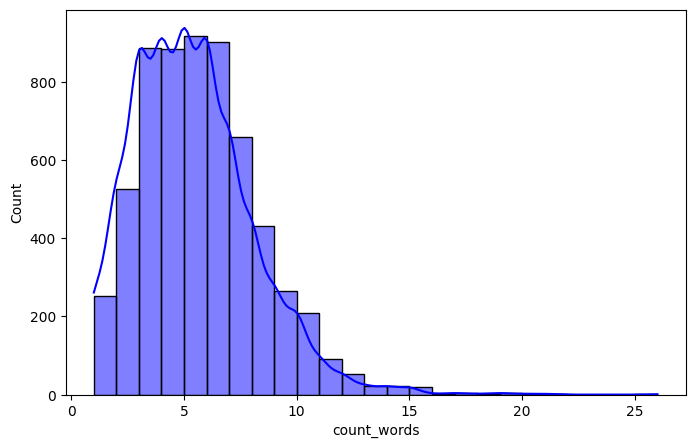

In [11]:
plt.figure(figsize=(8, 5))
sns.histplot(df_mad['count_words'], kde=True, bins = 25,color = 'blue')
plt.show()

In [12]:
df_mad['count_words'].value_counts().nlargest(10)

count_words
5     916
6     903
3     886
4     884
7     658
2     527
8     430
9     264
1     252
10    209
Name: count, dtype: int64

In [13]:
df_mad['count_words'].value_counts().nsmallest(10)

count_words
26     1
20     2
18     2
21     2
16     2
19     4
17     4
15    19
14    21
13    23
Name: count, dtype: int64

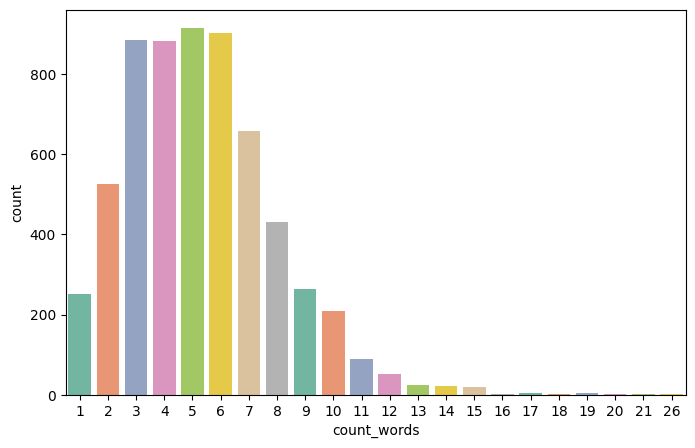

In [14]:
plt.figure(figsize=(8, 5))
sns.barplot(df_mad['count_words'].value_counts(), palette = 'Set2')
plt.show()

In [18]:
df_max_word_count = df_mad[df_mad['count_words'] > 15]
df_max_word_count

,audio_array,sr,text,duration,count_words,median_pitch,db_voice_volume,db_noise_level
243,[ 0. 0. 0. ... -0.00...,16000,с яндекс денег переведи двести рублей на номер...,12.770563,19,186.650809,-18.344017,-45.516518
515,[0.00000000e+00 0.00000000e+00 0.00000000e+00 ...,16000,окей виртуальный ассистент есть ли банкомат в ...,9.460000,17,203.601385,-21.617268,-35.079486
650,[ 0.00000000e+00 0.00000000e+00 0.00000000e+...,16000,покажи мне схему территории отеля и укажи стре...,11.420000,20,189.682411,-17.733763,-31.993590
1097,[ 0.00000000e+00 0.00000000e+00 0.00000000e+...,16000,на телефон с номером плюс семь девятьсот тридц...,12.960000,18,202.755454,-24.704243,-32.997065
1604,[ 3.05175781e-05 3.05175781e-05 0.00000000e+...,16000,окей гугл пополнить пожалуйста телефон на номе...,16.180000,21,196.062363,-19.090620,-38.952234
2084,[ 0.00000000e+00 0.00000000e+00 0.00000000e+...,16000,сделать перевод на телефон сто рублей на номер...,11.093000,17,194.825532,-17.842611,-46.472449
2558,[0.00000000e+00 3.05175781e-05 1.22070312e-04 ...,16000,мне нужно семнадцать хризантем для моей возлюб...,9.000000,16,190.801700,-17.859137,-50.786516
2666,[ 0.00000000e+00 -3.05175781e-05 -3.05175781e-...,16000,покажи пожалуйста русскую советскую комедию од...,15.240000,21,198.289441,-11.185741,-42.321625
2936,[ 0.00000000e+00 0.00000000e+00 0.00000000e+...,16000,хочу заказать какао несквик мягкая упаковка же...,17.100000,20,196.017441,-16.822622,-33.770181
3579,[-0.00021362 -0.00024414 -0.00030518 ... 0.00...,16000,хотела бы заказать продукты на дом сок голден ...,27.468812,26,205.663218,-21.325743,-45.404963


In [19]:
df_max_word_count['count_words'].describe()

count    17.000000
mean     18.823529
std       2.429900
min      16.000000
25%      17.000000
50%      19.000000
75%      20.000000
max      26.000000
Name: count_words, dtype: float64

* бе ме оставляем данные где сказано больше 2ух слов

In [26]:
df_mad2 = df_mad[df_mad['count_words'] > 2]

In [27]:
df_mad2

,audio_array,sr,text,duration,count_words,median_pitch,db_voice_volume,db_noise_level
0,[-3.05175781e-05 0.00000000e+00 0.00000000e+...,16000,три ангела на смотрешке,1.820000,4,208.679326,-16.237928,-51.932343
1,[0. 0. 0. ... 0.002197...,16000,цветущая парочка цветущие влюбленные восьмой с...,4.640000,6,211.282428,-13.890154,-31.375514
2,[3.05175781e-05 0.00000000e+00 0.00000000e+00 ...,16000,афина алиса скажи баланс карты сбербанк,4.620375,6,209.210110,-14.950606,-43.853320
3,[0.0098877 0.01049805 0.00750732 ... 0.002288...,16000,фильмец стэнли кубрика борджиа,5.540000,4,194.935480,-18.011992,-42.743308
4,[0. 0. 0. ... 0.000701...,16000,поставь бессердечный аш д,3.178313,4,163.985728,-18.152136,-38.880279
...,...,...,...,...,...,...,...,...
6146,[ 0.00000000e+00 3.05175781e-05 3.05175781e-...,16000,найти кино пастырь,2.660000,3,190.125653,-16.967820,-38.332441
6147,[ 0. 0. 0. ... 0.00...,16000,какие музыканты играют в клубах,2.066187,5,190.428395,-6.115799,-51.761285
6148,[0. 0. 0. ... 0.003417...,16000,джой включи килла инстинкт,4.272062,4,148.171818,-7.496449,-51.943409
6149,[ 0.00000000e+00 0.00000000e+00 0.00000000e+...,16000,канал ювелирочка смотреть передачи включи,4.460000,5,203.892488,-16.668974,-36.848823


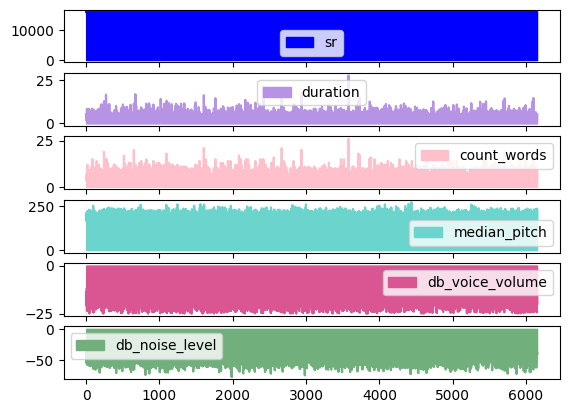

In [31]:
df_mad2.plot(kind='area', subplots=True, color = ['blue','#B793E6', 'pink', '#6AD4CD', '#DA5693', '#71AF7D']) # график; метод выводит графики по всем колонкам с числовыми типами данных
plt.show()

* Значения распределены относительно равномерно

____

## Формирование набора данных для обучения

In [56]:
from sklearn.model_selection import train_test_split

* Разбиваем данные на тренировочную, валидационную и тестовую выборки

In [51]:
print(len(df_mad2))  # Покажет количество строк

5372


In [68]:
train_data, valid_data = train_test_split(df_mad2, test_size = 0.15, random_state = 42)
train_data, test_data = train_test_split(train_data, test_size = 0.15, random_state = 42)

In [69]:
print(f'''
    Трен. выборка: {len(train_data)}
    Валид. выборка:{len(valid_data)}
    Тест. выборка: {len(test_data)}
''')


    Трен. выборка: 3881
    Валид. выборка:806
    Тест. выборка: 685



In [70]:
train_data.head()

,audio_array,sr,text,duration,count_words,median_pitch,db_voice_volume,db_noise_level
571,[-3.05175781e-05 0.00000000e+00 0.00000000e+...,16000,гостях сказки на смотрешке,2.460000,4,206.437238,-15.192749,-46.354766
59,[0. 0. 0. ... 0.003326...,16000,включи мне на телевизоре тнв,2.809250,5,226.898125,-11.971735,-39.092865
4144,[-3.05175781e-05 -6.10351562e-05 0.00000000e+...,16000,найди фильм тарантино,2.135813,3,211.817072,-16.591856,-51.533666
3440,[ 0.00158691 0.0010376 0.00112915 ... -0.00...,16000,тридцать семь тысяч австралийских долларов это...,4.960000,10,191.392688,-11.078948,-33.993057
4377,[ 0.00018311 0.00036621 0.00054932 ... -0.00...,16000,ассистент скажи можно взять в отеле напрокат к...,8.160000,10,199.663747,-16.489851,-35.009029


In [71]:
valid_data.head()

,audio_array,sr,text,duration,count_words,median_pitch,db_voice_volume,db_noise_level
462,[3.05175781e-05 6.10351562e-05 0.00000000e+00 ...,16000,что посоветуешь из актер джерард батлер,3.586000,6,203.851919,-11.484577,-58.771448
6055,[0.00131226 0.00045776 0.00036621 ... 0.005737...,16000,владимир эдуардович гадеев,2.986687,3,196.108110,-9.923843,-55.488350
4690,[0.00000000e+00 0.00000000e+00 0.00000000e+00 ...,16000,поставь эйч ди лайф на смотрешке,2.135000,6,195.416129,-11.606410,-48.622973
4495,[ 0. 0. 0. ... -0.00...,16000,хочу полететь в назрет из красного села,3.784438,7,194.503718,-17.264515,-31.649833
5237,[ 0.00000000e+00 0.00000000e+00 0.00000000e+...,16000,серикбай олегович ерофеев,3.620000,3,220.373507,-24.237759,-38.336441


In [72]:
test_data.head()

,audio_array,sr,text,duration,count_words,median_pitch,db_voice_volume,db_noise_level
6054,[ 0. 0. 0. ... -0.00...,16000,покажи мне канал морской на тв,4.852625,6,228.210295,-24.396570,-40.790920
4511,[-0.00460815 0.0062561 0.02514648 ... -0.00...,16000,поищи киноработу в духе мелодрамы,2.640000,5,185.635607,-9.289317,-62.115283
6123,[-3.05175781e-05 1.22070312e-04 -3.05175781e-...,16000,хочу посмотреть дьявол может плакать,4.180000,5,200.574509,-22.641110,-34.905440
4936,[ 0. 0. 0. ... -0.00...,16000,алена викторовна щербань,3.600000,3,193.111833,-22.599434,-38.713953
1898,[0. 0. 0. ... 0.000885...,16000,комедия две тысячи девятнадцатого года,6.478000,5,230.236090,-23.904787,-40.402291


Сохранение данных:

In [86]:
if os.path.exists(r'data_selections/selections.flag'):
    print('Данные для обучение сохранены')
else: 
    train_data.to_csv(r'data_selections/train.csv', sep = '|')
    valid_data.to_csv(r'data_selections/valid.csv', sep = '|')
    test_data.to_csv(r'data_selections/test.csv', sep = '|')
    open(r'data_selections/selections.flag', 'w').close()

Данные для обучение сохранены


____

* Файл с описанием набора данных:

In [ ]:
# open(r'data_selections/info_selections.txt', 'w').close

<function TextIOWrapper.close()>